# 7. Micro-Laboratorio (Ejercicio Pr√°ctico)

**Consigna:**

Usando las `reviews` y las funciones de preprocesamiento de clases previas (o volviendo a procesarlas ahora):
1.  Aseg√∫rate de tener la lista de `reviews_preprocesadas` (cada elemento es un string con los lemas unidos por espacios). Si no la ten√©s, gener√°la usando la funci√≥n `preprocesar_texto_para_vectorizar` sobre las `reviews` originales.
2.  **Crear Matriz BoW:**
    *   Instancia un `CountVectorizer`.
    *   Apl√≠calo a las `reviews_preprocesadas` usando `fit_transform()`.
    *   Obt√©n el vocabulario (`get_feature_names_out()`).
    *   Crea un DataFrame de Pandas para visualizar la matriz BoW.
3.  **Crear Matriz TF-IDF:**
    *   Instancia un `TfidfVectorizer`.
    *   Apl√≠calo a las **mismas** `reviews_preprocesadas` usando `fit_transform()`.
    *   **Importante:** Para comparar f√°cil, puedes pasarle el vocabulario aprendido por el CountVectorizer al TfidfVectorizer usando el argumento `vocabulary=`. O viceversa. La idea es que ambas matrices usen las mismas columnas en el mismo orden.
    *   Crea un DataFrame de Pandas para visualizar la matriz TF-IDF (redondea los valores a 3 decimales).
4.  **Analizar:**
    *   Imprime ambas matrices.
    *   Elige una o dos reviews. ¬øQu√© palabras tienen los pesos m√°s altos en TF-IDF para esa review? ¬øCoincide con lo que esperar√≠as que sean las palabras clave de esa review?
    *   Busca alguna palabra que tenga un conteo > 0 en BoW pero un peso TF-IDF relativamente bajo. ¬øPor qu√© podr√≠a ser? (Pista: ¬øaparece en muchas reviews?).

In [ ]:
# Dataset (el mismo del martes)
reviews = [
    "Una pel√≠cula emocionante con actuaciones brillantes. ¬°Me encant√≥!",
    "Muy aburrida y lenta. El gui√≥n era predecible y los actores no convenc√≠an.",
    "Los efectos especiales fueron impresionantes, pero la historia dejaba mucho que desear.",
    "¬°Qu√© gran comedia! Me re√≠ sin parar durante toda la pel√≠cula.",
    "Un documental necesario que aborda temas importantes con profundidad y sensibilidad."
]

In [ ]:
# 1. Importamos librer√≠as necesarias
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# 2. Cargamos modelo spaCy
nlp = spacy.load("es_core_news_sm")

# 3. Dataset de rese√±as
reviews = [
    "Una pel√≠cula emocionante con actuaciones brillantes. ¬°Me encant√≥!",
    "Muy aburrida y lenta. El gui√≥n era predecible y los actores no convenc√≠an.",
    "Los efectos especiales fueron impresionantes, pero la historia dejaba mucho que desear.",
    "¬°Qu√© gran comedia! Me re√≠ sin parar durante toda la pel√≠cula.",
    "Un documental necesario que aborda temas importantes con profundidad y sensibilidad."
]

# 4. Personalizamos stopwords
STOP_WORDS.update(["pel√≠cula", "film", "cine"])
STOP_WORDS.discard("necesario")  # palabra importante en contexto

# 5. Funci√≥n para preprocesar texto
def preprocesar_texto_para_vectorizar(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc
             if not token.is_stop and token.is_alpha and token.pos_ in ['NOUN', 'ADJ']]
    return " ".join(lemas)

# 6. Aplicamos funci√≥n a las reviews
reviews_preprocesadas = [preprocesar_texto_para_vectorizar(r) for r in reviews]

# 7. CountVectorizer (BoW)
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(reviews_preprocesadas)
vocabulario = vectorizer_bow.get_feature_names_out()

# 8. Visualizamos matriz BoW
df_bow = pd.DataFrame(X_bow.toarray(), columns=vocabulario)
print("Matriz BoW:")
print(df_bow)

# 9. TfidfVectorizer (usando el mismo vocabulario)
vectorizer_tfidf = TfidfVectorizer(vocabulary=vocabulario)
X_tfidf = vectorizer_tfidf.fit_transform(reviews_preprocesadas)

# 10. Visualizamos matriz TF-IDF
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vocabulario)
df_tfidf = df_tfidf.round(3)
print("\nMatriz TF-IDF:")
print(df_tfidf)


Matriz BoW:
   aburrido  actor  actuaci√≥n  brillante  comedia  documental  efecto  \
0         0      0          1          1        0           0       0   
1         1      1          0          0        0           0       0   
2         0      0          0          0        0           0       1   
3         0      0          0          0        1           0       0   
4         0      0          0          0        0           1       0   

   emocionante  especial  gui√≥n  historia  importante  impresionante  lento  \
0            1         0      0         0           0              0      0   
1            0         0      1         0           0              0      1   
2            0         1      0         1           0              1      0   
3            0         0      0         0           0              0      0   
4            0         0      0         0           1              0      0   

   necesario  predecible  profundidad  sensibilidad  tema  
0          0

In [ ]:
print("Conteo en BoW:")
print(df_bow["historia"])

print("\nPeso TF-IDF:")
print(df_tfidf["historia"])


Conteo en BoW:
0    0
1    0
2    1
3    0
4    0
Name: historia, dtype: int64

Peso TF-IDF:
0    0.0
1    0.0
2    0.5
3    0.0
4    0.0
Name: historia, dtype: float64


In [ ]:
!pip install wordcloud matplotlib


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

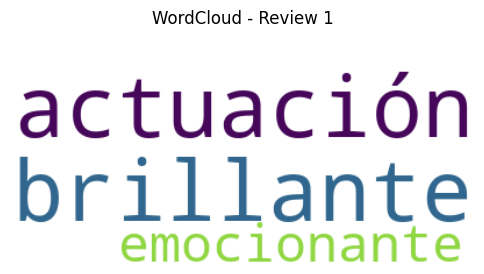

In [ ]:
# Review 0: "Una pel√≠cula emocionante con actuaciones brillantes. ¬°Me encant√≥!"

# Creamos WordCloud con los pesos TF-IDF de esa review
wc = WordCloud(background_color='white')

# Convertimos esa fila del DataFrame a diccionario
frecuencias = df_tfidf.iloc[0].to_dict()

# Generamos la nube de palabras
wc.generate_from_frequencies(frecuencias)

# Mostramos la imagen
plt.figure(figsize=(6, 4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Review 1")
plt.show()


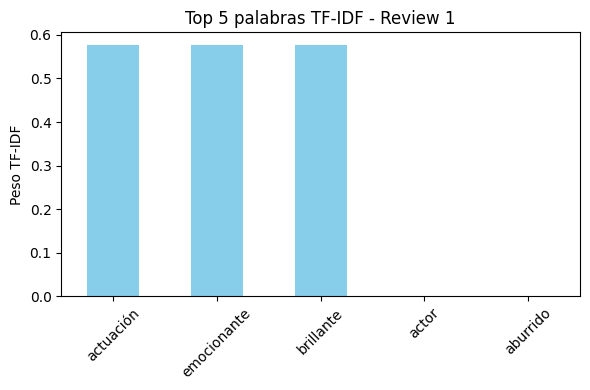

In [ ]:
# Tomamos la fila 0 y ordenamos las palabras por peso TF-IDF
top_palabras = df_tfidf.iloc[0].sort_values(ascending=False).head(5)

# Creamos el gr√°fico de barras
plt.figure(figsize=(6, 4))
top_palabras.plot(kind='bar', color='skyblue')
plt.title("Top 5 palabras TF-IDF - Review 1")
plt.ylabel("Peso TF-IDF")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Para la review 0 (positiva):

WordCloud con palabras como emocionante, actuaci√≥n.

Para la review 4 (documental):

Palabras como necesario, sensibilidad, profundidad, tema.

# 8. Brainstorming

Hemos visto BoW y TF-IDF. Son pasos importantes, pero ¬øson suficientes?

**¬øC√≥mo podemos representar el texto de manera que se preserve la informaci√≥n relevante y se minimice el ruido?**

*   ¬øQu√© informaci√≥n crucial **pierden** BoW y TF-IDF? (¬°El orden de las palabras! La sem√°ntica, la relaci√≥n entre palabras).
*   "El rey mat√≥ a la reina" vs "La reina mat√≥ al rey". ¬øBoW/TF-IDF las distinguir√≠an bien? (No mucho).
*   ¬øC√≥mo podr√≠amos capturar que "coche" y "auto" significan casi lo mismo? (BoW/TF-IDF las tratan como totalmente diferentes).
*   ¬øQu√© pasa con la **dimensionalidad**? Si tenemos 50,000 palabras √∫nicas, ¬°nuestros vectores tienen 50,000 dimensiones! ¬øEs eficiente?
*   ¬øC√≥mo afectan nuestras decisiones de preprocesamiento (stemming vs lematizaci√≥n, quitar o no ciertas palabras) a estas representaciones?

**Pr√≥ximos pasos (anticipo):**
*   **Word Embeddings (Word2Vec, GloVe, FastText):** Representar palabras como vectores densos (no dispersos como BoW/TF-IDF) en un espacio donde palabras sem√°nticamente similares est√©n cerca. ¬°Capturan significado!
*   **Modelos Secuenciales (RNN, LSTM, GRU):** Redes neuronales dise√±adas para procesar secuencias, teniendo en cuenta el orden de las palabras.
*   **Transformers (BERT, GPT):** Arquitecturas m√°s modernas que usan mecanismos de "atenci√≥n" para entender el contexto de cada palabra en la oraci√≥n.

**(Discusi√≥n en grupo)**

In [ ]:
# ‚úÖ BoW (Bag of Words) y TF-IDF nos ayudan a convertir texto en n√∫meros.
# Pero tienen limitaciones que pueden afectar el an√°lisis.

# üî¥ Problemas:
# - Pierden el orden de las palabras (no entienden si alguien "mat√≥" o "fue matado").
# - No capturan el significado de las palabras (sem√°ntica).
# - No detectan que "coche" y "auto" son sin√≥nimos.
# - Cada palabra se trata como independiente, sin contexto.
# - Las matrices son muy grandes si hay muchas palabras (alta dimensionalidad).

# üìå Ejemplo cl√°sico:
# - "El rey mat√≥ a la reina" y "La reina mat√≥ al rey" se ven casi iguales para BoW/TF-IDF.
# - Pero su significado es muy distinto.

# ü§î ¬øQu√© informaci√≥n perdemos?
# - Relaci√≥n entre palabras.
# - Contexto.
# - Sentido del mensaje completo.
# - Variaciones del idioma (jerga, dialectos, lenguaje inclusivo).

# ‚ö†Ô∏è Preprocesamiento influye mucho:
# - Usar stemming puede eliminar diferencias importantes en palabras.
# - Quitar stopwords puede borrar palabras clave en ciertos contextos (como "ella", "nosotros", etc.).

# üöÄ Pr√≥ximos pasos para mejorar:
# - Word Embeddings (Word2Vec, GloVe, FastText): cada palabra es un vector en un espacio donde las que tienen significados parecidos est√°n cerca.
# - Modelos secuenciales como RNN, LSTM: capturan el orden y contexto de las palabras.
# - Transformers como BERT o GPT: comprenden el contexto completo gracias a la atenci√≥n.

# üéØ Objetivo:
# Representar el texto de manera m√°s inteligente para que los modelos "entiendan" lo que se dice, no solo cu√°ntas veces aparece una palabra.


Instalar y cargar spaCy con embeddings

In [6]:
# Instalamos el modelo en espa√±ol con vectores (esto puede tardar un poco)
!python -m spacy download es_core_news_md


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 16.3 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
# Importamos spaCy y cargamos el modelo
import spacy
nlp = spacy.load("es_core_news_md")  # Modelo mediano con vectores sem√°nticos


Comparar palabras similares

In [8]:
# Obtenemos los vectores de palabras
coche = nlp("coche")[0]
auto = nlp("auto")[0]
pel√≠cula = nlp("pel√≠cula")[0]

# Similitud entre palabras
print("Similitud coche-auto:", coche.similarity(auto))  # Cercano a 1 = muy similares
print("Similitud coche-pel√≠cula:", coche.similarity(pel√≠cula))  # M√°s bajo = no tan similares


Similitud coche-auto: 0.6847264170646667
Similitud coche-pel√≠cula: 0.08302406221628189


Vector de una oraci√≥n y comparaci√≥n

In [9]:
# Dos frases parecidas pero con diferente orden
doc1 = nlp("El rey mat√≥ a la reina")
doc2 = nlp("La reina mat√≥ al rey")

# Similaridad entre oraciones (captura algo de contexto)
print("Similitud entre frases:", doc1.similarity(doc2))


Similitud entre frases: 0.9099435210227966


Vector promedio de las reviews

In [10]:
# Reviews originales
reviews = [
    "Una pel√≠cula emocionante con actuaciones brillantes. ¬°Me encant√≥!",
    "Muy aburrida y lenta. El gui√≥n era predecible y los actores no convenc√≠an.",
    "Los efectos especiales fueron impresionantes, pero la historia dejaba mucho que desear.",
    "¬°Qu√© gran comedia! Me re√≠ sin parar durante toda la pel√≠cula.",
    "Un documental necesario que aborda temas importantes con profundidad y sensibilidad."
]

# Procesamos con spaCy
docs = list(nlp.pipe(reviews))

# Mostramos el vector promedio de cada review (vector denso)
for i, doc in enumerate(docs):
    print(f"Vector de review {i+1} (primeros 5 valores): {doc.vector[:5]}")


Vector de review 1 (primeros 5 valores): [ 0.01422908 -1.2421327   0.42049226  1.6378264  -2.4651606 ]
Vector de review 2 (primeros 5 valores): [ 1.2137749   1.4092737  -0.69858336 -0.6962506  -1.1362714 ]
Vector de review 3 (primeros 5 valores): [ 1.48806     1.0643457  -0.05676565 -1.2164907   0.9206864 ]
Vector de review 4 (primeros 5 valores): [ 0.19361147 -0.26253143  0.09899179  0.26913413 -1.0728858 ]
Vector de review 5 (primeros 5 valores): [ 1.1327076  -0.13129333 -1.5542892  -0.35944164  0.503674  ]


Estas representaciones s√≠ capturan similitudes sem√°nticas, como que coche y auto son parecidos.

Tambi√©n capturan algo del contexto, aunque modelos m√°s potentes como BERT o GPT lo hacen mucho mejor.

Los vectores no son dispersos como en BoW/TF-IDF. Son densos y eficientes.